## Advanced Machine Learning - SciKit Learn
### with Andreas Mueller 

# Cross-Validation
First, import packages and load iris dataset: 150 samples (X), and 4 features (y)
* Split the whole dataset into Training set (75%) and Test set (25%)
* Train classifier (e.g., K Nearest Neighbors) on TRAIN data using fit method
* Evaluate the model on the TEST set using the score method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Validation with a training / test split
* [                      ALL DATA (100%)                      ]
* [           Training Data (75%)    ] / [   Test Data (25%)    ]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

#### Accuracy measure indicates 100% of TEST set was correctly classified 
* High estimate may not be that trustworthy, may need another estimate of how classifier generalizes
* We can get a better sense of the data, by sampling from the entire data set, using each parts as test sets. 

## K-Fold Cross-Validation for more robust estimates
Entire dataset is divided into k-folds, typically into either 10 or 5 equal portions
For each iteraction, one fold is held out as TEST set, remaining folds used as TRAIN set. 
Thus, each fold in dataset is used as the TEST sample at least once, take the average of scores as accuracy
* Split 1: [fold 1]   fold 2    fold 3    fold 4    fold 5
* Split 2:  fold 1   [fold 2]   fold 3    fold 4    fold 5
* Split 3:  fold 1    fold 2   [fold 3]   fold 4    fold 5
* Split 4:  fold 1    fold 2    fold 3   [fold 4]   fold 5
* Split 5:  fold 1    fold 2    fold 3    fold 4   [fold 5]

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[ 0.98039216  0.98039216  1.        ]
0.986928104575


NOTE: Better to use stratified strategy for classification when doing k-fold cross-validation, which ensures the class proportions in the dataset are represented in each fold. For regression standard k-fold is used. 

In [8]:
cross_val_score(classifier, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

## Custom cross-validation iterators
* Many options for cross-validation in sklearn: KFold, StratifiedKFold, ShuffleSplit,
* Each cross-validation is a generator so sets of indices for the TRAIN and TEST sets
* Stratified K-fold cross-val takes some samples from beginning, some from end in each of folds

In [9]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

In [10]:
cv = StratifiedKFold(iris.target, n_folds=5)
for train, test in cv:
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


##### We can visualize the splits in cross-val with helper function
* Plots an array of tests sets in each iteration; first, for Stratified K-fold with 5 folds
* In this matrix, each column corresponds to a sample in the data set
* Each rolw corresponds to one iteration of Stratified K-fold cross-val, 
* Yellow parts are the test sets for each iteration

In [11]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)

### Compare Stratified K-fold with Standard K-fold cross-validation
* First fifth of data is in the first test set, second fifth in second set, and so on, etc. 
* However, for the iris dataset set we are using, many of the folds only contain one class. 
* Solve this problem using random permutation, using shuffle parameter

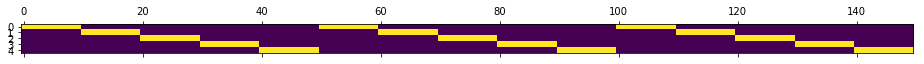

In [12]:
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)

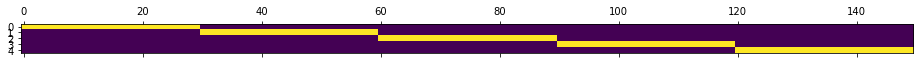

In [13]:
cv = KFold(n_samples, n_folds=5)
plot_cv(cv, n_samples)

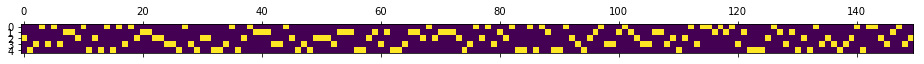

In [14]:
cv = KFold(n_samples, n_folds=5, shuffle=True)
plot_cv(cv, n_samples)

### Compare 5-fold to 10-fold Cross-validation
* We have 10 iterations, but TEST sets are smaller, only half as big as for 5-fold cross-val, across iterations
* Increasing the number of folds gives larger training set, but more repetitions, slower evaluations
* Too many folds also means that TEST set gets very small, larger variation between outcomes

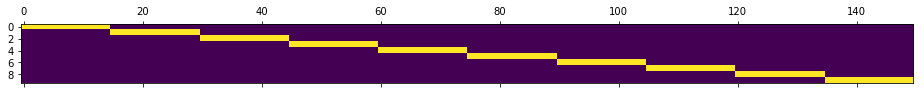

In [15]:
cv = KFold(n_samples, n_folds=10)
plot_cv(cv, n_samples)

### Suffle Spllit solves some of these problems
* Splits off random portion of the data repeatedly 
* Allows user to specify number of repetitions and training set size, independently

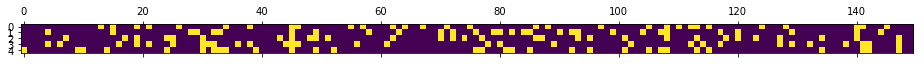

In [16]:
# Five iterations, and test set 20%

cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
plot_cv(cv, n_samples)

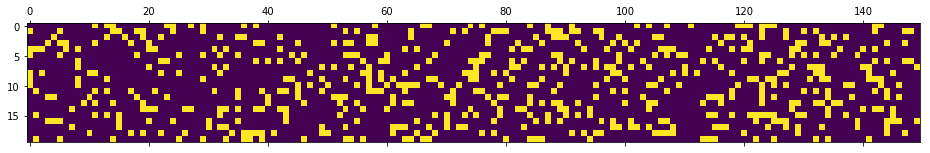

In [17]:
# Increase number of iterations to 20, with same test set size

cv = ShuffleSplit(n_samples, n_iter=20, test_size=.2)
plot_cv(cv, n_samples)

##### We can use all of these cross-validation iterators using cross-val score function
* Giving cross-validation iterator as cv argument

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

# Parameter Estimation with GridSearchCV 
* Import packages and load iris dataset: 150 samples (X), and 4 features (y)
* Split dataset into TRAIN (75%) and TEST set (25%)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

### Kernelized Support Vector Classifier (SVC) parameters:
* Very sensitive to the parameters C and gamma, both floating points numbers that need to be set
* C parameter controls the smoothness of the decision boundary
* gamma parameter controls the inverse radius of amples around data pointn that is relevant

In [22]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

## Manual Variant
* Want to use cross validation to estimate each parameter setting
* Could do this using a loop, over all Cs and all gammas
* However, we can use GridSearchCV to do the same thing more simply

In [23]:
from sklearn.model_selection import cross_val_score

for C in Cs:
    for gamma in gammas:
        scores = cross_val_score(SVC(C=C, gamma=gamma), X, y)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: 0.913807
C: 0.001000, gamma: 0.010000, average score: 0.913807
C: 0.001000, gamma: 0.100000, average score: 0.919935
C: 0.001000, gamma: 1.000000, average score: 0.953840
C: 0.010000, gamma: 0.001000, average score: 0.913807
C: 0.010000, gamma: 0.010000, average score: 0.913807
C: 0.010000, gamma: 0.100000, average score: 0.919935
C: 0.010000, gamma: 1.000000, average score: 0.953840
C: 0.100000, gamma: 0.001000, average score: 0.913807
C: 0.100000, gamma: 0.010000, average score: 0.913807
C: 0.100000, gamma: 0.100000, average score: 0.926879
C: 0.100000, gamma: 1.000000, average score: 0.966912
C: 1.000000, gamma: 0.001000, average score: 0.913807
C: 1.000000, gamma: 0.010000, average score: 0.947304
C: 1.000000, gamma: 0.100000, average score: 0.973448
C: 1.000000, gamma: 1.000000, average score: 0.973856
C: 10.000000, gamma: 0.001000, average score: 0.947304
C: 10.000000, gamma: 0.010000, average score: 0.973448
C: 10.000000, gamma: 0.100

## GridSearchCV
* Create a grid of values for C and gamma
* Verbosity setting
* Use 5-fold CV

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}

print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}


In [33]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

In [34]:
grid_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.866667, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.966667, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.833333, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.966667, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.933333, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.866667, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.01 ................................................
[CV] ................. C=10, gamma=0.01, score=0.966667, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................. C=10, gamma=0.01, score=1.000000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................. C=10, gamma=0.01, score=0.966667, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................. C=10, gamma=0.01, score=0.966667, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................. C=10, gamma=0.01, score=1.000000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................. C=10, gamma=0.1, score=0.966667, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................. C=10, gamma=0.1, score=1.000000, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

#### Use "best_params_" attribute to get best parameters
* and use best_scores_ attribute to get the best accuracy

In [35]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [36]:
grid_search.best_score_

0.97999999999999998

### Visualize mean scores from GridSearchCV
* We can access the mean score for all parameter settings, using grid_scores_ attribute 
* This tells us whether we picked releveant paramaters to search over, and if ranges are sensible
* Across both axes, scores vary quite a bit; results are stable if C is at least 1, and gamma is 0.1

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([<matplotlib.axis.YTick at 0x114067390>,
 <a list of 5 Text yticklabel objects>)

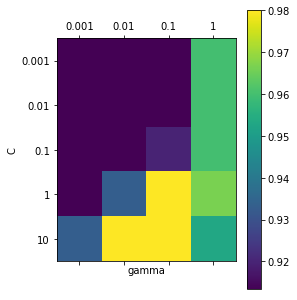

In [39]:
# Extract just the scores
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(5, 4)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(4), param_grid['gamma'])
plt.yticks(np.arange(5), param_grid['C'])

## Avoid Overfitting with Hyper-Parameters
If data set is very noisy and we tried many parameter settings, one parameter may have worked well by chance
* We should have a separate hold out set to test if our GridSearch overfits
* GridSearchCV works like any other classifier: split data in TRAIN and TEST sets
* Fit model on TRAIN set, and evaluate it on the TEST set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

#### After the best parameter setting is identified using cross validation:
* A new model is constructed using the whole training set, and this best setting
* Then we call predict or score on grid search object, this model trained on the test set and best settings is used
* This yields a score that cannot overfit on our selection of the hyper-parameters  

In [42]:
grid_search.predict(X_test)

array([1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1])

In [43]:
grid_search.score(X_test, y_test)

1.0

## Nested Cross Validation
We can go one step further and use cross_val_score to evaluate grid search; good for small datasets  
* Two nested for loops hidden here: 
* Outer loop: cross_val_score performs cross validation to evaluate the grid search cv object
* Inner loop: for each iteration of CV, grid_search splits training set into folds and performs CV to find the best parameters

In [44]:
cross_val_score(grid_search, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])